A US office equipment store chain seeks to enhance its shipping operations' resilience across multiple locations.  To assist with the analysis the following business questions need to be answered:

1. Which region had the highest profit and which category in that region was the highest grossing for each shipping type
2. What were the sales and profits for all and each shipping mode
3. What were the top states and cities in-terms of sales and profits
4. What was the unit sale price for each product shipped, which category and sub-category products had the highest sales and profit
5. what category, sub-category, region and city incured the greatest loss
6. Which sub-categories with losses had discount on the products
7. Which product was shipped the most by the most popular shipping mode
8. What the sales and profit figures for each segment
9. Which segment grossed the highest profit and the sales and loss and what was their preferred shipping method

To analyze the data set the appropiate libraries need to be imported. For the analysis section, Pandas python libarary is used. Pandas is a libarary writte for Python programming langauge and is used for data manipulation and analysis. matplotlib is a pyhton library that is used for visualizations of the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('SampleSuperstore.csv') #Pandas is used to read the dataset and store it in a variable df
df.head() # Used to display the first 5 rows of the dataset, more rows can be displayed by entering the number between the parentheses

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape #looking at the size of the dataset

(9994, 13)

To understand the dataset, some data exploration is required. This is particularly important as it allows for the data scientists to account for discrete and missing values which may effect the result of the analysis. Through the data exploration a data scientist can also understand the dataset better which makes navigating the dataset easier.

In [ ]:
df.isnull().sum() #Looking for null values in rows and summing their counts.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null values in the dataset

In [ ]:
df.nunique() # Counting the number of distinct values in each column

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

The above synatx displays the distict values in each column. As can be seen above, the dataset includes data for 531 cities spread accross 49 states and 4 regions. there are 3 segments and 4 ship modes. There are 3 product catergories and 17 sub-catergories. Interestingly, there are only 14 unique values for the quantity of products sold. That is, the customers order only 14 distict number of products.

The data set looks well organized and there are no missing or discrete values hence, no cleaning is required.

In [ ]:
df.dtypes


Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

The above syntax .dtype displays the type of elements in each column.  The postal code and the quantity are integers whereas discount sales and profit are floats.  This feature is useful if the difference contains a large number of columns

1. **Which region had the highest profit and which category in that region was the highest grossing**

In [ ]:
dfhpr=df.groupby(["Region"])["Profit"].sum().nlargest()
# cretaing a sub-dataset by grouping by region taking the  the sum of the profits and the largest value
print(dfhpr) # Syntax to Print the variable dfhpr


Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64


The region with the highest profit was the West region with a value of 108,418

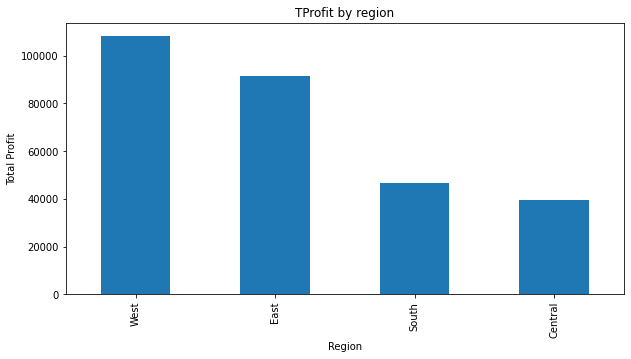

In [ ]:
dfhpr.plot(kind='bar',figsize=(10,5)) # Plotting a bar graph of regions and their profits
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('TProfit by region')
plt.show()

As can be seen in the above graph, the highest profit region was West followed by East then South and Central was the least profitable region

In [ ]:
dfhprw=df.loc[(df['Region']=='West')] # Accessing only the West region of the sub-dataset
dfhprw.groupby(["Category"])["Profit"].sum().nlargest() # Summing up the profit by Category and ordering it by the largest

Category
Office Supplies    52609.8490
Technology         44303.6496
Furniture          11504.9503
Name: Profit, dtype: float64

The highest profit making category were the Office Supplies with a value of 52,609

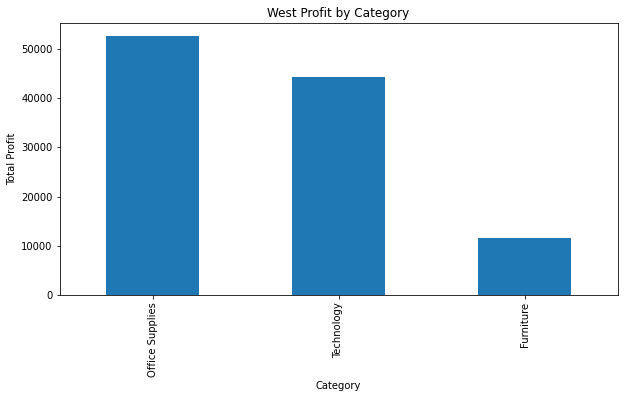

In [ ]:
dfhprw.groupby(["Category"])["Profit"].sum().nlargest().plot(kind='bar',figsize=(10,5)) # Plotting a bar graph of Category and total Profit
plt.xlabel('Category') #x-axis label
plt.ylabel('Total Profit')# y-axis label
plt.title('West Profit by Category') #plot title
plt.show()

In the above bar graph office supply had the highest profit followed by technology and lastly furniture in the west region

**2. What were the sales and profits for all and each shipping mode**



In [ ]:
sm = df['Ship Mode'].unique().tolist() # created a list with the various ship modes

def shipmode_profit(df, n): # Created a function that takes the input of the dataset and the ship mode and returns the one with the largest profit
    dfsmp = df.loc[(df['Ship Mode'] == n)]
    result = dfsmp.groupby(["Ship Mode"])["Profit"].sum()
    return result

for i in sm: # this syntax itterates through the list created earlier and passes them into the function to get the profits
  profit_by_ship_mode=shipmode_profit(df,i)
  print (profit_by_ship_mode)

Ship Mode
Second Class    57446.6354
Name: Profit, dtype: float64
Ship Mode
Standard Class    164088.7875
Name: Profit, dtype: float64
Ship Mode
First Class    48969.8399
Name: Profit, dtype: float64
Ship Mode
Same Day    15891.7589
Name: Profit, dtype: float64


We can see the standard class ship mode had the highest profit followed by second class in first class with her which had similar profits and same day ship mode had the least profit

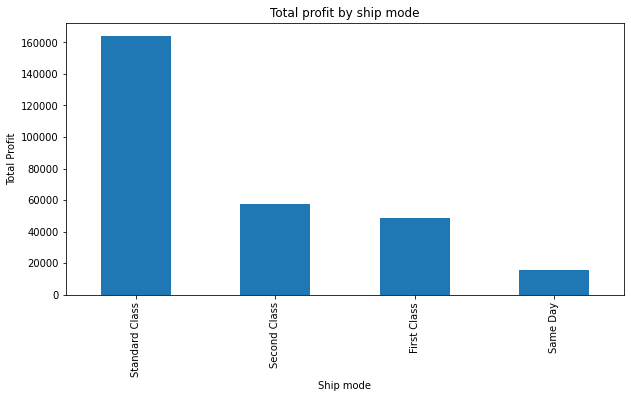

In [ ]:
df.groupby(["Ship Mode"])["Profit"].sum().nlargest().plot(kind='bar',figsize=(10,5)) # Here we grouped the Ship Mode, summed the Profit and ordered the result in a decending mannner using the .n
plt.title('Total profit by ship mode')
plt.xlabel('Ship mode')
plt.ylabel('Total Profit')
plt.show()

The graph represents the result of the function showing showing standard class as having the highest total profit and the first class and second class having similar profit profiles and same day being the least profitable

In [ ]:
sm = df['Ship Mode'].unique() # created a list with the various ship modes

def shipmode_sales(df, n): # Created a function that takes the input of the dataset and the ship mode and returns the one with the largest sales
    dfsms = df.loc[(df['Ship Mode'] == n)]
    result = dfsms.groupby(["Ship Mode"])["Sales"].sum()
    return result

for i in sm: # This syntax itterates through the list created earlier and passes them into the function to get the sales
  sales_by_ship_mode=shipmode_sales(df,i)
  print (sales_by_ship_mode)

Ship Mode
Second Class    459193.5694
Name: Sales, dtype: float64
Ship Mode
Standard Class    1358215.743
Name: Sales, dtype: float64
Ship Mode
First Class    351428.4229
Name: Sales, dtype: float64
Ship Mode
Same Day    128363.125
Name: Sales, dtype: float64


Standard class has the highest sales followed by Second Class and First Class with Same Day having the lowest sales

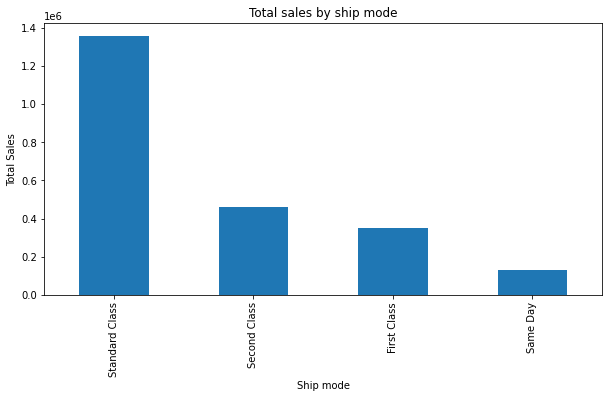

In [ ]:
df.groupby(["Ship Mode"])["Sales"].sum().nlargest().plot(kind='bar',figsize=(10,5))
plt.xlabel('Ship mode')
plt.ylabel('Total Sales')
plt.title('Total sales by ship mode')
plt.show()

The above graph shows the total sales by Ship Mode. Standard class had the highest sales which were more than double the second class which had the second highest sales followed by the first class and same-day having the lowest sales.

**3. What were the top states and cities in-terms of sales and profits**

In [ ]:
def city_state_profit_sales(df,y,n): # defining a function here with arguments
    result = df.groupby([y])[n].sum().nlargest() #code to be executed
    return result # retuning the result


In [ ]:
city_state_profit_sales(df, 'State','Profit') # calling the function and entering the arguments


State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

The states with the  with the highest profit were California which had a profit of 76,381 which was closely followed by New York and Washington.

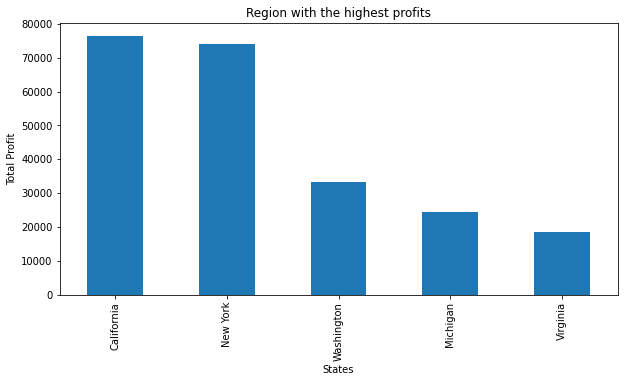

In [ ]:
city_state_profit_sales(df, 'State','Profit').plot(kind='bar',figsize=(10,5))
plt.xlabel('States')
plt.ylabel('Total Profit')
plt.title('Region with the highest profits')
plt.show()

Plotting the results, we can see that the states with the highest profit were California closely followed by New York and then Washington in 3rd place with Michigan and Virginia in 4th and 5th place respectively.

In [ ]:
city_state_profit_sales(df, 'City','Profit').nlargest

<bound method Series.nlargest of City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64>

The cities with the highest profits were New York City with a profit of 62,036 followed by Los Angeles, Seattle and San Francisco.

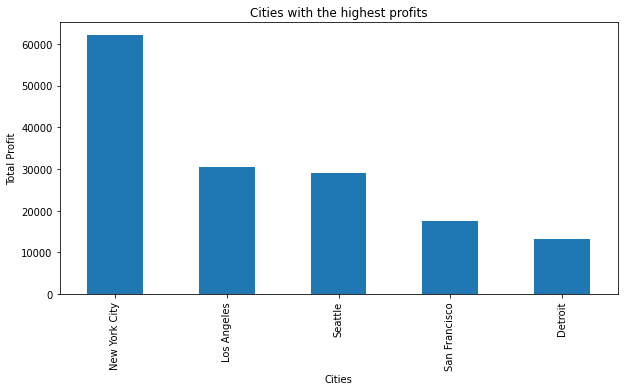

In [ ]:
city_state_profit_sales(df, 'City','Profit').plot(kind='bar',figsize=(10,5))
plt.xlabel('Cities')
plt.ylabel('Total Profit')
plt.title('Cities with the highest profits')
plt.show()

Plotting the bar graph shows that New York City had the highest profit by city which was followed by Los Angeles and Seattle with San Francisco and Detroit being in 4th and 5th place respectively.

In [ ]:
city_state_profit_sales(df, 'State','Sales')

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64

The states with the highest sale was California. This correlates with the profit per state analysis which showed that California had the highest profit. It it one again followed by New York and Texas which is in 3rd place

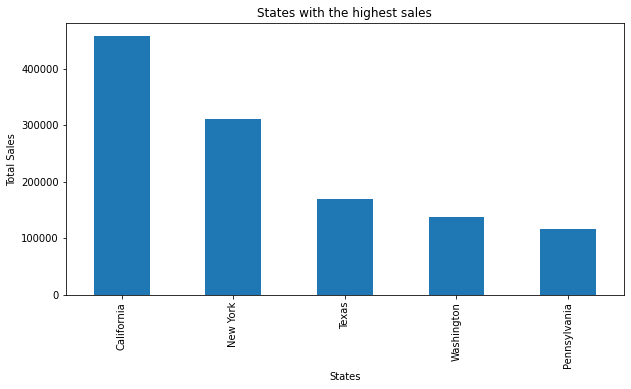

In [ ]:
city_state_profit_sales(df, 'State','Sales').plot(kind='bar',figsize=(10,5))
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.title('States with the highest sales')
plt.show()

For the sales, California once again is the state with the highest sales followed by New York and Texas.

In [ ]:
city_state_profit_sales(df, 'City','Sales')

City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Name: Sales, dtype: float64

The city with the highest sales was once again New York similar to the city with the highest profit. This was follwed by Los Angeles and Seattle in 2nd and 3rd.

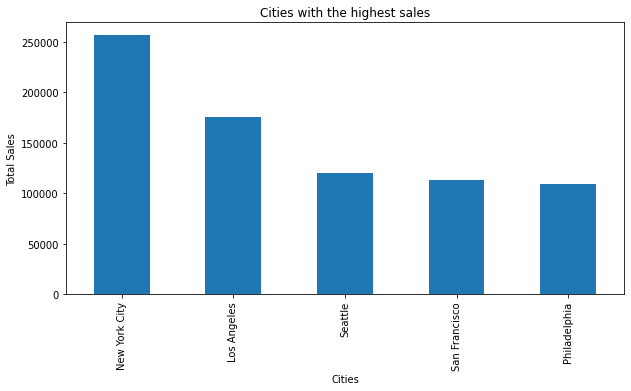

In [ ]:
city_state_profit_sales(df, 'City','Sales').plot(kind='bar',figsize=(10,5))
plt.xlabel('Cities')
plt.ylabel('Total Sales')
plt.title('Cities with the highest sales')
plt.show()

Plotting the function we can see that New York has the highest sales followed by Los Angeles and Seattle. This was similar to the profits by city above however here, the 5th highest sales were in Philadelphia in contrast to the profits where Detroit occupied the 5th position

**4. What was the unit sale price for each product shipped, which category and sub-category products had the highest sales and profit**

In [ ]:
df['Unit Price'] = df['Sales'] / df['Quantity'] # creating a new column which is the result of quotient of the other 2 columns
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Unit Price
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840


**5. what category, sub-category and region incured the greatest loss.**





In [ ]:
class Losses: #created a class and called it Loss

    def __init__(self, df): # the attribute of the class is a the dataset df
        self.df = df

    def region_loss(self): # defined a method that calculates the loss using a groupby synatx
        loss = self.df[self.df['Profit'] < 0].groupby(['Region'])['Profit'].sum().sort_values(ascending=True)
        return loss # the sort_values sorts the values in an ascending manner

    def category_loss(self):
        loss = self.df[self.df['Profit'] < 0].groupby(['Category'])['Profit'].sum().sort_values(ascending=True)
        return loss

    def subcategory_loss(self):
        loss = self.df[self.df['Profit'] < 0].groupby(['Sub-Category'])['Profit'].sum().nsmallest()
        return loss

    def state_loss(self):
        loss = self.df[self.df['Profit'] < 0].groupby(['State'])['Profit'].sum().nsmallest()
        return loss







In [ ]:
dfloss_rg=Losses(df) # Creating an instance of loss and calling it dfloss_rg
print(dfloss_rg.region_loss()) # Calling to print its method .loss_per_region

Region
Central   -56314.8850
East      -49590.6075
South     -27504.8323
West      -22720.9609
Name: Profit, dtype: float64


The region with the greatest loss was the Central Region followed bythe East and the South. The West region had the lowest loss and correlates with the earlier analysis where the West had the highest profit and the Central region had the lowest profit.

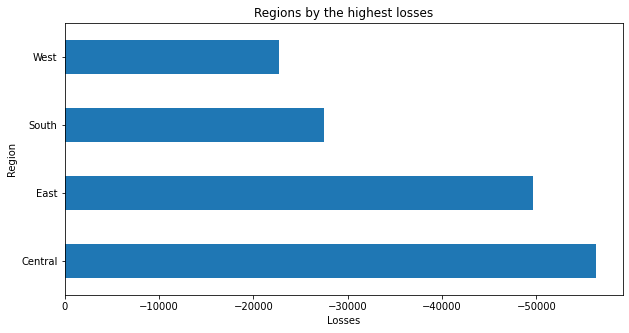

In [ ]:
dfloss_rg.region_loss().plot(kind='barh',figsize=(10,5))
plt.xlabel('Losses')
plt.ylabel('Region')
plt.title('Regions by the highest losses')
plt.gca().invert_xaxis()

The above plot shows the total losses per region with Central region being the region with the highest loss and the West having the lowest loss.

In [ ]:
dfloss_ct=Losses(df) # Creating an instance of loss and calling it dfloss_cat
print(dfloss_ct.category_loss()) # Calling to print its method .loss_per_category

Category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: Profit, dtype: float64


The furniture category had the highest loss with 60,939 and technology had the lowest loss of 38,579.

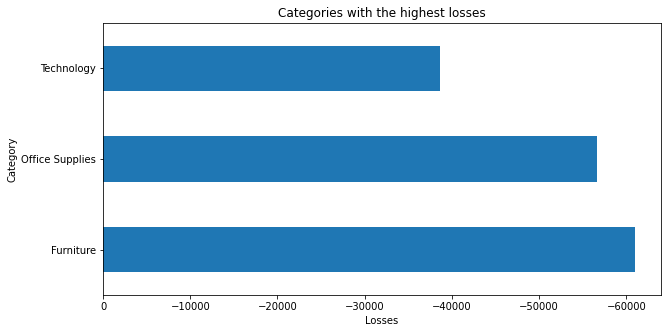

In [ ]:
dfloss_ct.category_loss().plot(kind='barh',figsize=(10,5))
plt.xlabel('Losses')
plt.ylabel('Category')
plt.title('Categories with the highest losses')
plt.gca().invert_xaxis()

The Furniture category had the highest loss followed by the Office Supplies and Technology having the lowest losses.

In [ ]:
dfloss_sct=Losses(df)
print(dfloss_ct.subcategory_loss())

Sub-Category
Binders     -38510.4964
Tables      -32412.1483
Machines    -30118.6682
Bookcases   -12152.2060
Chairs       -9880.8413
Name: Profit, dtype: float64


binders were the sub-category with the highest loss followed by tables machines and bookcases. This is similar to the prior results where furniture had the highest loss as 3 of the items in sub-category with the highest losses are in the furniture category.

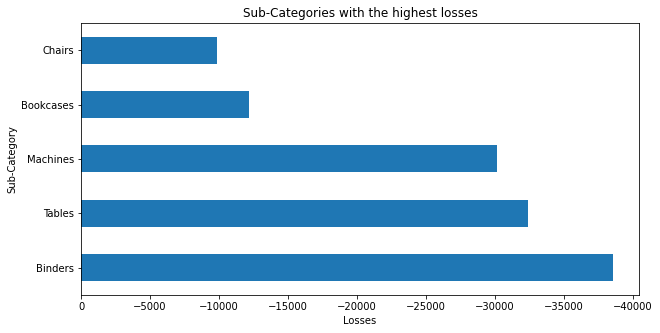

In [ ]:
dfloss_sct.subcategory_loss().plot(kind='barh',figsize=(10,5))
plt.xlabel('Losses')
plt.ylabel('Sub-Category')
plt.title('Sub-Categories with the highest losses')
plt.gca().invert_xaxis()

Binders are leading in-terms of losses per sub-category followed by tables and machines.

In [ ]:
dfloss_st=Losses(df)
print(dfloss_st.state_loss())

State
Texas            -36813.1875
Ohio             -21750.0002
Pennsylvania     -21602.8515
Illinois         -19501.6975
North Carolina   -11557.9854
Name: Profit, dtype: float64


Texas had the highest loss with 36,813 followed by Ohio and Pennsylvania. Illinois and North Carolina states were in 4th and 5th place in-terms of total losses

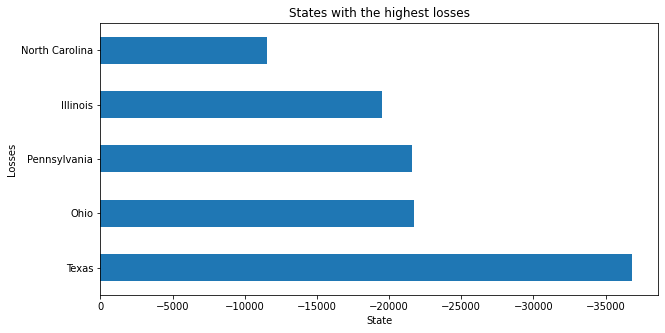

In [ ]:
dfloss_st.state_loss().plot(kind='barh',figsize=(10,5))
plt.xlabel('State')
plt.ylabel('Losses')
plt.title('States with the highest losses')
plt.gca().invert_xaxis()

Texas had the highest loss and Interestingly, Texas was also the state that had the 3rd highest sales as was shown earlier.

**6. Which sub-categories with losses had discount on the products**

In [ ]:
st=[] # Creating an empty list
for index, row in df.loc[df['Profit']<0].iterrows(): # itterrating through the rows where profit was less than 0
  if row['Discount']>0: # Selecting the in the discount column where the discount was greater than 0
    st.append(row['Sub-Category']) # Appending the items in the sub-category column to the list
    sv=pd.DataFrame(st) # Converting the list as a pandas dataframe
sv.value_counts() # Counting the values in the dataframe

Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
dtype: int64

Binders were the items that incurred the greatest loss with 613 sales showing a negative profit followed by Chairs with 235 sales and tables after that with 203 sales. These findings also resemble the losses analyzed above by category which showed that furniture had the greatest loss and in this analysis 6 of the items in the top 7 are furnishings.

<function matplotlib.pyplot.show(close=None, block=None)>

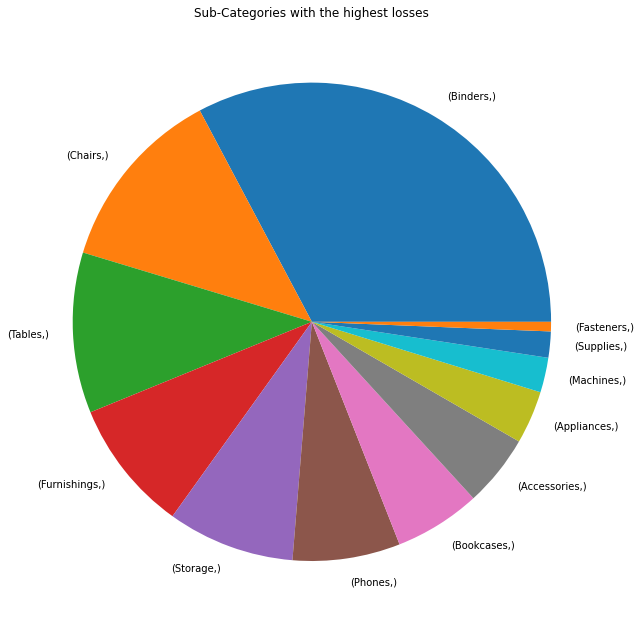

In [ ]:
sv.value_counts().plot(kind='pie',figsize=(14,11))
plt.xlabel('')
plt.ylabel('')
plt.title('Sub-Categories with the highest losses')
plt.show

Plotting the pie chart shows that binders were the items that incurred the greatest loss however, if we combine chairs, furnishings storage and tables which are in the furnishing category we can see that these the greatest losses overall.

Text(0.5, 1.0, 'Sub-Categories with the highest losses as a percentage')

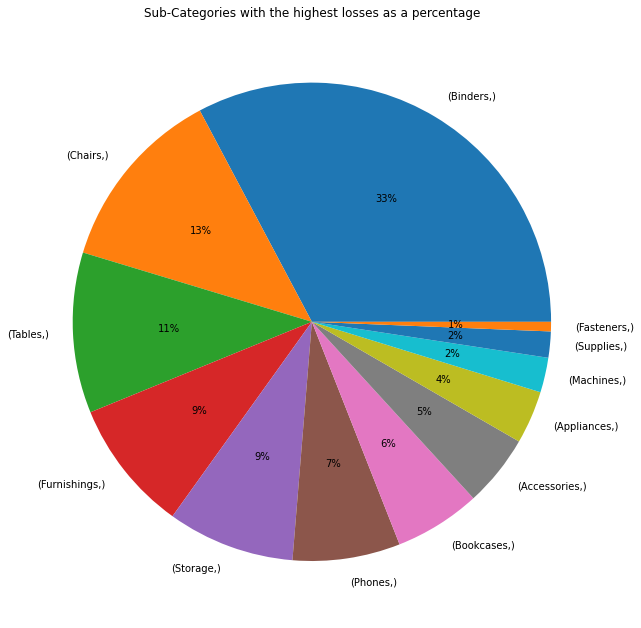

In [ ]:
sv.value_counts().plot(figsize=(14,11),kind='pie', y='votes_of_each_class', autopct='%1.0f%%')
plt.xlabel('')
plt.ylabel('')
plt.title('Sub-Categories with the highest losses as a percentage')

Plotting a pie chart with the pecentages of the items we can clearly see that the in the 15 loss making items in the sub-category, 42% of them were from the furnishing category

**7. Which product was shipped the most by the most popular shipping mode**

In [ ]:
df.groupby('Ship Mode')['Sub-Category'].value_counts().nlargest(5)#sort_values().nlargest(5)

Ship Mode       Sub-Category
Standard Class  Binders         947
                Paper           783
                Furnishings     575
                Phones          534
                Storage         504
Name: Sub-Category, dtype: int64

Standard Class was the preferred ship mode and the Binders were the most shipped item through this mode. Paper was 2nd and Furnishings 3rd follwed by Phones and Storage

**8. What were the sales and profit figures per segment**

In [ ]:
sales_profit= df.groupby('Segment').agg(Total_Sales=("Sales",'sum'),Average_Sales=('Sales','mean'),Total_Profit=("Profit",'sum'),Average_Profit=('Profit','mean'))
print (sales_profit)

              Total_Sales  Average_Sales  Total_Profit  Average_Profit
Segment                                                               
Consumer     1.161401e+06     223.733644   134119.2092       25.836873
Corporate    7.061464e+05     233.823300    91979.1340       30.456667
Home Office  4.296531e+05     240.972041    60298.6785       33.818664


The consumer segement had the highest total sales and total profit however, its average profit was the lowest amongst the three. the home offic segment had the highest average profit and average sales but the lowest total sales.

<Axes: xlabel='Segment'>

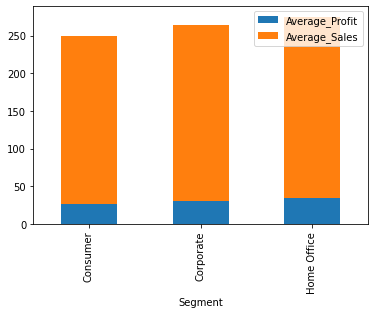

In [ ]:
df.groupby('Segment').agg(Average_Profit=('Profit','mean'),Average_Sales=('Sales','mean')).plot(kind='bar', stacked=True)

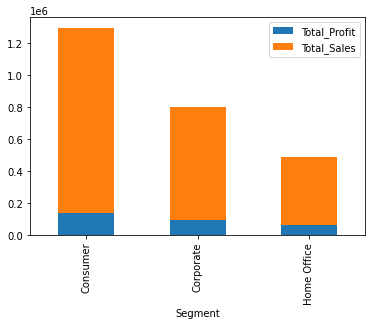

In [ ]:
summary= df.groupby('Segment').agg(Total_Profit=("Profit",'sum'),Total_Sales=("Sales",'sum')).plot(kind='bar', stacked=True)

**Conclusion**

The above analysis of the store's shipping methods were successfully completed and all questions answerd. As can be seen from the above analysis, the profit and sales along with losses vary by region, city and sub-category and shipping mode